In [1]:
import os
import random
import pandas as pd
from PIL import Image, ImageDraw, ImageFont
from pycocotools.coco import COCO

test_json = COCO('/opt/ml/detection/dataset/test.json') # test.jon 경로
cate_info = test_json.dataset['categories']

# 카테고리 별 색깔 설정
cate_color = {0: 'red', 1:'orange', 2:'yellow', 3:'green', 4:'blue', 5:'pink', 6:'brown', 7:'purple', 8:'navy', 9:'white'}
# 카테고리 별 이름
cate_name = []
for j in range(10):
    cate_name.append(cate_info[j]['name'])
# print(cate_name)

# 폰트
font = ImageFont.truetype("/usr/share/fonts/dejavu/DejaVuSans.ttf", 40)

submission_path = '/opt/ml/detection/baseline/faster_rcnn/faster_rcnn_torchvision_submission.csv' # submission.csv 경로
submission = pd.read_csv(submission_path)
# submission['PredictionString'].info

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


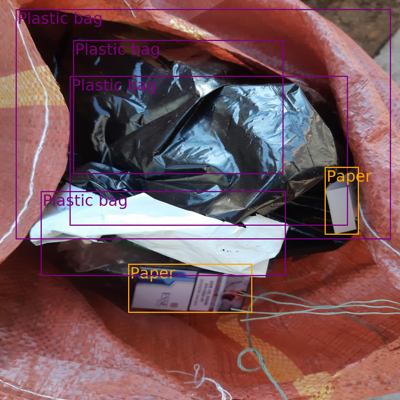

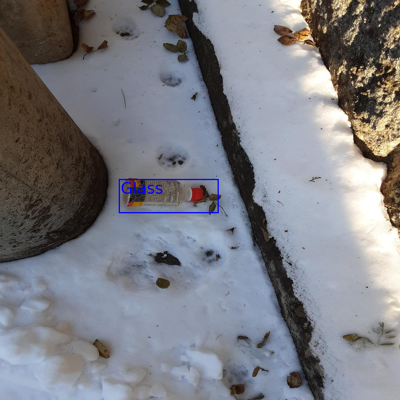

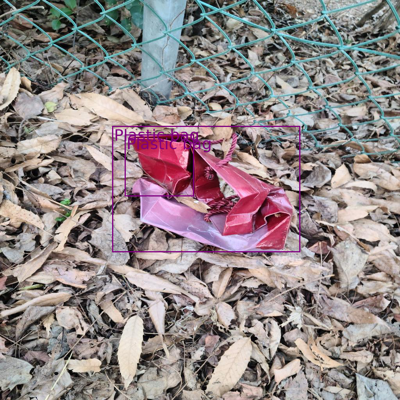

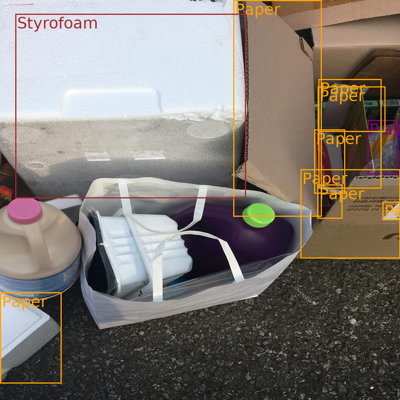

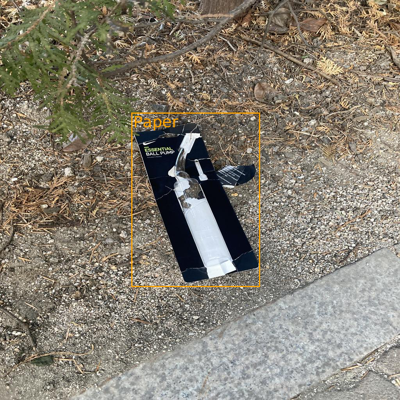

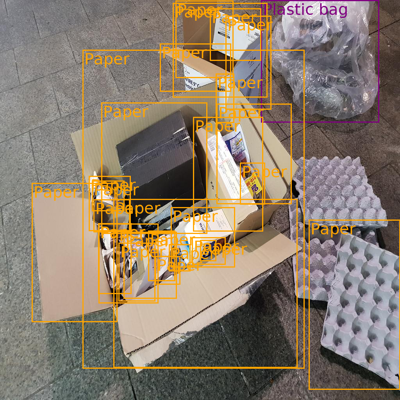

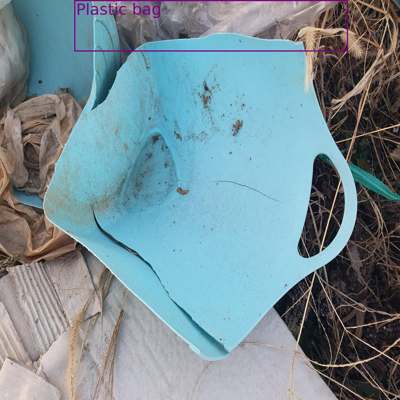

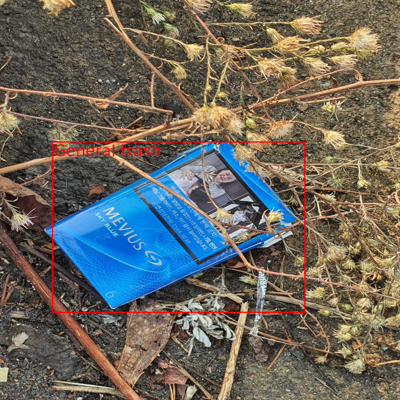

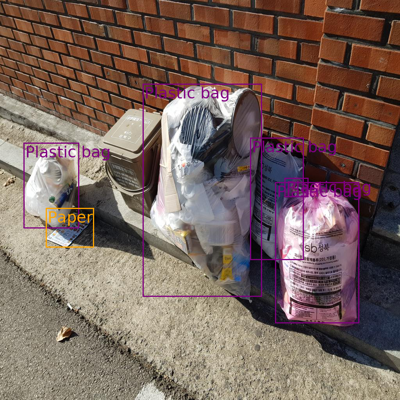

In [2]:
data_dir = '/opt/ml/detection/dataset'
for _ in range(10):
    ran_num = random.randint(0, 4870)
    test_image = submission.iloc[ran_num]['image_id']
    infos = submission.iloc[ran_num]['PredictionString']
    if type(infos) == str:
        bbox_info = infos.split()
    else:
        continue
    # print(bbox_info)

    bboxes = []
    for i, v in enumerate(bbox_info):
        if i % 6 == 0:
            bboxes.append([])
        bboxes[-1].append(float(v))

    img = Image.open(os.path.join(data_dir, test_image))
    draw = ImageDraw.Draw(img)
    # bboxes의 리스트들은 label, score, xmin, ymin, xmax, ymax 순서
    for idx in range(len(bboxes)):
        [xmin, ymin, xmax, ymax] = bboxes[idx][2:]
        draw.rectangle((xmin, ymin, xmax, ymax), outline=cate_color[int(bboxes[idx][0])], width = 3)
        # text 위치
        text_pos = (xmin+5, ymin)
        draw.text(text_pos, cate_name[int(bboxes[idx][0])], fill=cate_color[int(bboxes[idx][0])], font=font)

    img_small = img.resize((400, 400))
    img_small.show()